**Vamos experimentar agora o algoritmo Decision Tree?**

In [380]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [381]:
import pickle
with open('Titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [382]:
modelo = DecisionTreeClassifier(criterion='gini')
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier()



> **Vamos testar o modelo?**



In [383]:
previsoes = modelo.predict(X_teste)

In [384]:
previsoes

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])



> **Será se o modelo acertou?**



In [385]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [386]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.770949720670391

In [387]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[86, 19],
       [22, 52]])

c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.770949720670391

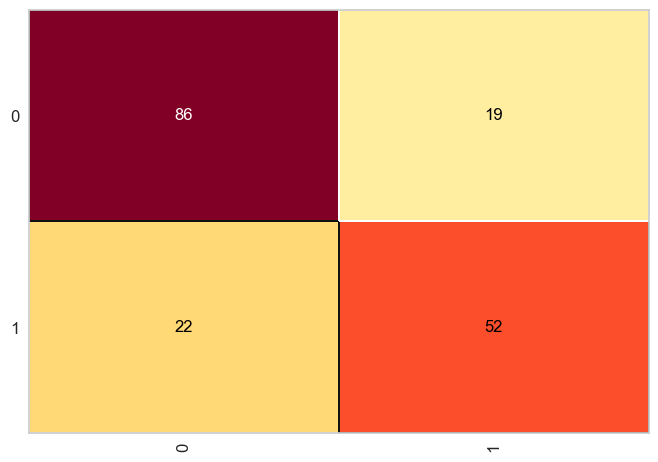

In [388]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [389]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.73      0.70      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



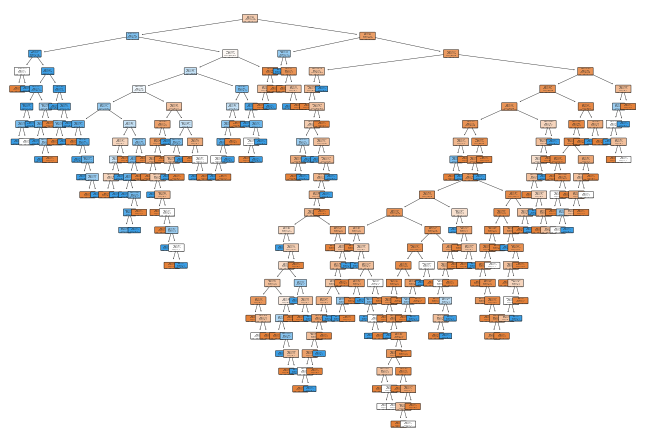

In [390]:
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Feature names (predictors)
previsores = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# 2. Class names (target) as strings
class_names = ['Não Sobreviveu', 'Sobreviveu']

# 4. Plot the tree with compact settings
tree.plot_tree(
    modelo,
    feature_names=previsores,
    class_names=class_names,
    filled=True,               # Color-filled nodes
    rounded=True,              # Rounded nodes
)

plt.show()